In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [3]:
import pandas as pd
data = pd.read_csv("musk_csv.csv")

In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
data.isna().sum() #checking missing values

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

In [6]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]
#to_drop = [column for column in corr.abs().columns if any(corr.abs()[column] > 0.92)]

In [7]:
df = data.drop(columns = to_drop)

In [8]:
df.shape

(6598, 117)

In [9]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape

(5278, 113)

In [10]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [11]:
a=[1]*Xtrain.shape[0]
Xtrain["demo"]=a
Xtrain.shape

(5278, 114)

In [12]:
b=[1]*Xtest.shape[0]
Xtest["demo"]=b
Xtest.shape

(1320, 114)

In [13]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [14]:
x_train.shape

(5278, 19, 6, 1)

In [15]:
x_test.shape

(1320, 19, 6, 1)

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [24]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=17,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/17
5278/5278 [==============================] - 4s 846us/step - loss: 0.1211 - acc: 0.9507 - val_loss: 0.1073 - val_acc: 0.9576
Epoch 2/17
5278/5278 [==============================] - 2s 427us/step - loss: 0.1144 - acc: 0.9519 - val_loss: 0.0970 - val_acc: 0.9621
Epoch 3/17
5278/5278 [==============================] - 2s 423us/step - loss: 0.1152 - acc: 0.9511 - val_loss: 0.0964 - val_acc: 0.9644
Epoch 4/17
5278/5278 [==============================] - 3s 479us/step - loss: 0.1041 - acc: 0.9562 - val_loss: 0.1017 - val_acc: 0.9583
Epoch 5/17
5278/5278 [==============================] - 3s 531us/step - loss: 0.0926 - acc: 0.9600 - val_loss: 0.1156 - val_acc: 0.9591
Epoch 6/17
5278/5278 [==============================] - 3s 614us/step - loss: 0.0964 - acc: 0.9600 - val_loss: 0.0807 - val_acc: 0.9697
Epoch 7/17
5278/5278 [==============================] - 2s 448us/step - loss: 0.0817 - acc: 0.9634 - val_loss: 0.0842 - val_acc: 0.9727


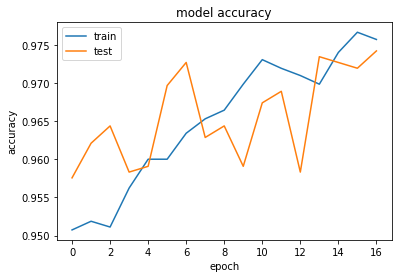

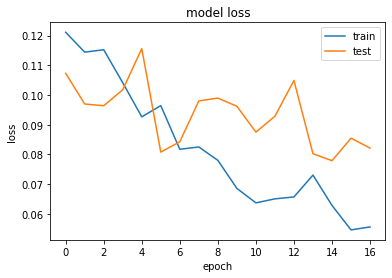

In [25]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9065934065934066
recall: 0.8549222797927462
Validation Loss: 0.0821126712726034
Validation Accuracy: 0.9742424242424242
